In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns

import torch
from torch import nn



In [5]:
ds = load_breast_cancer()

In [6]:
ds.target.shape

(569,)

In [7]:
ds.data.shape

(569, 30)

In [8]:
ds['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
len(ds['feature_names'])

30

In [10]:
print(ds['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
df_preditores = pd.DataFrame(ds.data)


In [12]:
df_preditores.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df_alvo = pd.DataFrame(ds.target)

In [24]:
df_alvo[0]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: 0, Length: 569, dtype: int64

In [14]:
np.random.seed(123)
torch.manual_seed(123)

<Axes: xlabel='0', ylabel='count'>

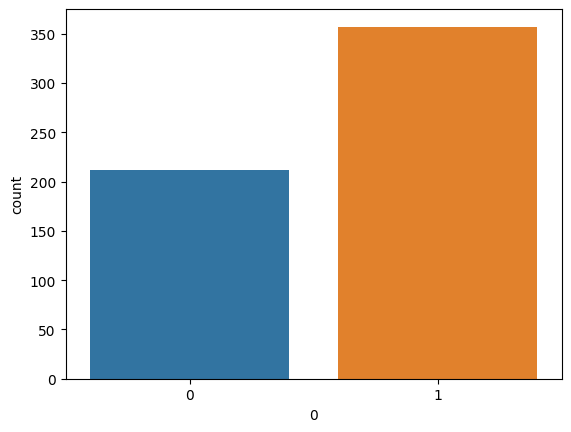

In [30]:
sns.countplot(x=df_alvo[0])

In [31]:
dfPreditoresTreinamento, dfPreditoresTeste, dfAlvoTreinamento, dfAlvoTeste = train_test_split(df_preditores,df_alvo,test_size=.25)

In [38]:
print('Tamanho Treinamento preditor',len(dfPreditoresTreinamento))
print('Tamanho Treinamento Alvo',len(dfAlvoTreinamento))
print('Tamanho Teste preditor',len(dfPreditoresTeste))
print('Tamanho Teste Alvo',len(dfAlvoTeste))

Tamanho Treinamento preditor 426
Tamanho Treinamento Alvo 426
Tamanho Teste preditor 143
Tamanho Teste Alvo 143


In [36]:
len(dfPreditoresTreinamento)

426

Criando tensores dos df

In [48]:
tensorPreditoresTreinamento = torch.tensor(dfPreditoresTreinamento.to_numpy(), dtype=torch.float)

In [49]:
tensorAlvoTreinamento = torch.tensor(dfAlvoTreinamento.to_numpy(), dtype=torch.float)

In [50]:
dsTensor = torch.utils.data.TensorDataset(tensorPreditoresTreinamento, tensorAlvoTreinamento)

In [54]:
#A classe DataLoader é responsavel pelo calculo do erro de forma estocastica, atraves da tecnica de minibatch
# mantem ainda um registro dos regustris que ha firam utilizados no calculo do erro para que não sejam repetidos

train_dsTensor = torch.utils.data.DataLoader(dsTensor,batch_size=10,shuffle=True)

In [55]:
train_dsTensor


Construção do modelo


  Esse modelo como se trata de uma classificação binaria, ou seja a classificação será como tumor maligno ou benigno, então precisaremos apenas de 1 neuronio na saida, pois com 1 um neuronio conseguimos classificar binariamente, e como temos  30 features de entrada, por fim quanto a camada oculta temos que (30+1)-2 = 15.5
  logo teremos 16 neuronio na camada oculta, ou nas camadas ocultas.


In [58]:
classificador = nn.Sequential(
    #30 entradas ligando aos 16 neuronios, produto escalar, nn.Linear é uma rede  densa todas as entradas se ligam a todos os neuronios
    nn.Linear(in_features=30, out_features=16),\
    #func ativacao recebendo valor da func soma
    nn.ReLU(),\

    #segunda camada oculta
    nn.Linear(in_features=16,out_features=16),\
    #func ativacao recebendo valor da func soma da seunda camada oculta
    nn.ReLU(),\

    #segunda camada oculta se ligando a saida, 16neuronios camdas oculta com 1 neuronio da saida
    nn.Linear(in_features=16,out_features=1),\
    #a func sigmoide será utilizada pois probabilidade de pertencer a class
    nn.Sigmoid(),\
)

In [60]:
#visualizando arquitetura da rede neural
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

Vai fazer o calculo do erro pra saber se o gradiente cai aumentar ou diminuir os pesos

In [72]:
criterio = nn.BCELoss()

Criando o otimizador que irá utilizar o optimizador Adam que é calcula o erro com o estocastico adam
 e lr( learn rate) e weight_decay que é um parametro que multiplica a lr a cada epoca para ajudar a encontrar o minimo global

In [63]:

otimizador = torch.optim.Adam(classificador.parameters(),lr=0.0001,weight_decay=0.0001)

Treinando mOdelo
como foi separado o dataset de teste foi .25% da base (569 registros) 569x0.25 = 143 o treino foi 426, desta forma se utilizarmos 100 epocas para o treinamento e ajuste dos pesos, tendo em vista que o batch_size=10 ou seja cada batch terá 10 registros 426 registros/10 = 42.6 aproximadamente 43 ajustes de pesos por cada epoca

Lembrando que em cada epoca ele passa por todos os 426 registros separados em aproximadamente 42.6 batch com 10 registros cada e calcula o erro, desta forma temos que criar um totalizador(acunulador) de erros.
Atraves do otimizador.zero_grad() a cada ajuste de peso (ou seja a cada epoca) zeramos o gradiente



In [120]:
numeroEpocas =100

In [121]:
previsoesRealizadasPorEpocas=[]

for epocas in range(numeroEpocas):
  acumuladorErro = .0
  previsoesPorBatch = []
  previsoesRealizadasPorEpocas.append(previsoesPorBatch)
  for data in train_dsTensor:
    previsores, alvo = data
    # print(" Atributos -- > ",previsores)
    # print("Alvo ou seja classe --> ",alvo)
    classificador.zero_grad() #zera o valor de gradiente

    previsao = classificador(previsores) #faz o foward da rede
    #print(previsao)
    erro = criterio(previsao, alvo) #calcula o erro saida prevista menos a saida real

    erro.backward() #realiza o backpropagation

    otimizador.step() #atualiza os pesos, descida do gradiente acontece efetivamente aqui

    acumuladorErro += erro.item() #realizando somatorio do erro so pra visualizar

    previsoesPorBatch.append(previsao)


  print('Epoca %3d: perda %.5f'%(epocas+1,acumuladorErro/len(train_dsTensor))) #calcula a media do erro dos 426 registros a cada epoca


Epoca   1: perda 0.18067
Epoca   2: perda 0.17902
Epoca   3: perda 0.18817
Epoca   4: perda 0.18907
Epoca   5: perda 0.18520
Epoca   6: perda 0.18526
Epoca   7: perda 0.18295
Epoca   8: perda 0.18198
Epoca   9: perda 0.18746
Epoca  10: perda 0.18009
Epoca  11: perda 0.18893
Epoca  12: perda 0.18206
Epoca  13: perda 0.18483
Epoca  14: perda 0.17992
Epoca  15: perda 0.18209
Epoca  16: perda 0.17773
Epoca  17: perda 0.17823
Epoca  18: perda 0.17989
Epoca  19: perda 0.18697
Epoca  20: perda 0.18032
Epoca  21: perda 0.17691
Epoca  22: perda 0.17853
Epoca  23: perda 0.18072
Epoca  24: perda 0.17837
Epoca  25: perda 0.17926
Epoca  26: perda 0.18103
Epoca  27: perda 0.17488
Epoca  28: perda 0.18815
Epoca  29: perda 0.18013
Epoca  30: perda 0.17886
Epoca  31: perda 0.17657
Epoca  32: perda 0.17554
Epoca  33: perda 0.18873
Epoca  34: perda 0.18257
Epoca  35: perda 0.18235
Epoca  36: perda 0.17857
Epoca  37: perda 0.18237
Epoca  38: perda 0.17450
Epoca  39: perda 0.17597
Epoca  40: perda 0.17890


In [123]:
len(previsoesRealizadasPorEpocas)

100

In [146]:
aux = previsoesRealizadasPorEpocas[99]


In [148]:
len(aux)

43

Agora que a rede neural ja está treinada e com os pesos, podemos ver esses pesos  

In [160]:
pesosFinaisDoModelo =list(classificador.parameters())

In [161]:
pesosFinaisDoModelo

[Parameter containing:
 tensor([[ 9.3580e-03, -1.3033e-02, -3.9011e-02,  4.5862e-02, -1.1173e-01,
          -3.0411e-01, -7.4420e-01, -5.6799e-01, -6.7189e-02,  8.7035e-02,
          -8.3216e-03,  1.0997e-01, -2.0915e-01, -1.5671e-01, -3.1833e-02,
          -2.3583e-01, -3.2147e-01, -1.1493e-01, -4.6194e-02, -2.0581e-02,
           2.1430e-01, -5.2434e-03,  8.6831e-02,  1.7110e-01, -1.1763e-01,
          -4.4735e-01, -6.8912e-01, -3.6580e-01,  5.8927e-02, -1.8569e-01],
         [ 2.4947e-01,  7.2658e-02,  1.3986e-01,  5.5713e-02,  1.0037e-01,
          -4.7079e-01, -8.5980e-01, -6.3089e-01, -8.9466e-02,  6.2243e-02,
           3.9103e-02, -5.0925e-02, -6.0927e-02,  1.3526e-01, -6.5450e-02,
          -2.9221e-01, -3.5667e-01, -1.8183e-01, -2.0253e-02, -4.4715e-02,
           1.5908e-01,  2.0567e-03,  8.7386e-02,  6.7147e-02, -8.7347e-02,
          -6.9461e-01, -7.6980e-01, -3.8667e-01, -6.8362e-02, -2.0792e-01],
         [-3.0441e-03,  5.8726e-03, -4.0799e-04, -3.7237e-04,  7.2640e-03,


In [163]:
#na camada de entrada temos 30 entradas logo 30 pesos e 16 neuronios
pesos0 = pesosFinaisDoModelo[0]
pesos0.shape

torch.Size([16, 30])

In [164]:
pesos0

Parameter containing:
tensor([[ 9.3580e-03, -1.3033e-02, -3.9011e-02,  4.5862e-02, -1.1173e-01,
         -3.0411e-01, -7.4420e-01, -5.6799e-01, -6.7189e-02,  8.7035e-02,
         -8.3216e-03,  1.0997e-01, -2.0915e-01, -1.5671e-01, -3.1833e-02,
         -2.3583e-01, -3.2147e-01, -1.1493e-01, -4.6194e-02, -2.0581e-02,
          2.1430e-01, -5.2434e-03,  8.6831e-02,  1.7110e-01, -1.1763e-01,
         -4.4735e-01, -6.8912e-01, -3.6580e-01,  5.8927e-02, -1.8569e-01],
        [ 2.4947e-01,  7.2658e-02,  1.3986e-01,  5.5713e-02,  1.0037e-01,
         -4.7079e-01, -8.5980e-01, -6.3089e-01, -8.9466e-02,  6.2243e-02,
          3.9103e-02, -5.0925e-02, -6.0927e-02,  1.3526e-01, -6.5450e-02,
         -2.9221e-01, -3.5667e-01, -1.8183e-01, -2.0253e-02, -4.4715e-02,
          1.5908e-01,  2.0567e-03,  8.7386e-02,  6.7147e-02, -8.7347e-02,
         -6.9461e-01, -7.6980e-01, -3.8667e-01, -6.8362e-02, -2.0792e-01],
        [-3.0441e-03,  5.8726e-03, -4.0799e-04, -3.7237e-04,  7.2640e-03,
          2.93

In [179]:
#valores do bias da camada de entrada, para cada uma da 16 neuronios
bias0 = pesosFinaisDoModelo[1]
bias0.shape


torch.Size([16])

In [180]:
bias0

Parameter containing:
tensor([ 1.7308e-01,  3.6920e-02, -6.0615e-03, -9.8667e-02, -4.1626e-01,
         1.2202e-01, -1.1537e-38,  2.6143e-38, -1.0279e-01, -2.3973e-38,
         1.3862e-01,  1.6972e-01, -2.0445e-01, -1.5698e-01, -3.0594e-38,
        -1.2221e-39], requires_grad=True)

In [177]:
#pesos da primeira camda oculta para a segunda camada oculta
peso1=pesosFinaisDoModelo[2]
peso1.shape


torch.Size([16, 16])

In [178]:
peso1

Parameter containing:
tensor([[ 8.2452e-05,  2.5720e-05, -2.5763e-38,  1.5113e-05, -1.4517e-05,
          9.9268e-06,  1.0411e-38,  2.5033e-38, -2.8992e-04, -4.0952e-38,
         -2.8814e-03,  6.1688e-12,  3.8066e-06,  1.1529e-04, -4.2777e-38,
         -6.5831e-38],
        [-4.2871e-04, -1.6652e-04,  6.5382e-39, -9.4697e-06, -1.4754e-04,
         -6.1904e-05, -1.9488e-38, -4.0053e-38, -2.0024e-04,  3.5496e-40,
         -3.7905e-04, -3.5723e-38, -3.0880e-06, -4.2761e-05, -4.9245e-38,
         -4.5456e-38],
        [ 1.6315e-01,  3.7002e-02,  1.0047e-03,  2.0303e-01,  2.3572e-01,
         -5.5200e-02, -1.3985e-06, -6.1745e-38,  2.4555e-01, -4.0342e-40,
         -4.5881e-02,  6.5167e-02,  2.6713e-01,  1.2032e-01,  6.8100e-06,
          9.4952e-19],
        [-3.7619e-03, -1.2118e-02, -9.0388e-09, -2.0750e-01,  6.4826e-02,
         -1.3620e-02,  2.8740e-40, -1.4564e-38,  1.8799e-01,  2.6496e-39,
         -2.2367e-01,  1.1921e-01,  1.0821e-01,  9.5684e-02, -2.2910e-38,
         -1.1820e-38]

In [183]:
bias1 = pesosFinaisDoModelo[3]
bias1.shape

torch.Size([16])

In [185]:
bias1

Parameter containing:
tensor([ 3.3092e-39,  3.8342e-39, -4.4097e-01, -3.7766e-05,  5.1806e-18,
         1.1124e-38, -6.1868e-02,  4.0367e-01,  2.8964e-02,  1.0751e-02,
         1.8857e-02,  4.8009e-02, -8.6798e-39, -1.1328e-38,  4.1100e-01,
         9.2007e-39], requires_grad=True)

In [186]:
#pesos da camada de saida
peso2 = pesosFinaisDoModelo[4]
peso2.shape

torch.Size([1, 16])

In [187]:
peso2

Parameter containing:
tensor([[-1.4917e-06, -2.4296e-03, -1.0757e-01,  1.1372e-01, -5.7938e-05,
         -2.6615e-38, -2.0735e-01,  2.8242e-01,  1.5743e-01,  1.1819e-01,
          1.0253e-02,  2.4759e-01,  5.0758e-06, -1.8115e-38,  2.7710e-01,
          1.5471e-03]], requires_grad=True)

In [191]:
#bias do neuronio da camda de saida
bias2 = pesosFinaisDoModelo[5]
bias2.shape

torch.Size([1])

In [193]:
bias2

Parameter containing:
tensor([0.3368], requires_grad=True)

Agora que ja temos os pesos, pois nossa rede ja foi treinada podemos iniciar o teste com nosso modelo criado.
Vale ressaltar que o objetivo de uma rede neural é encontrar o valor dos pesos.
Para que nossa rede pare de treinar precisamos chamar o metodo classificador.eval(),
desta forma mudamos para o modo de avaliação, e as operações matematicas deixam de ser monitoradas para determinação do gradiente e as camadas de dropout são desligadas

In [196]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [194]:
tensorPreditoresTeste = torch.tensor(dfPreditoresTeste.to_numpy(), dtype=torch.float)

In [197]:
previsoes = classificador.forward(tensorPreditoresTeste)

In [199]:
previsoes

tensor([[9.8511e-01],
        [9.9241e-01],
        [4.6727e-02],
        [9.7753e-01],
        [4.6418e-05],
        [7.6470e-01],
        [9.6930e-01],
        [8.3149e-01],
        [6.3773e-01],
        [9.4671e-01],
        [9.9560e-01],
        [1.8786e-04],
        [1.3314e-01],
        [9.8728e-01],
        [8.9108e-01],
        [6.9083e-01],
        [9.8436e-01],
        [9.8959e-01],
        [9.9217e-01],
        [9.4708e-01],
        [3.6233e-07],
        [3.9573e-03],
        [8.5568e-01],
        [9.6357e-01],
        [8.7130e-01],
        [5.2197e-03],
        [6.3756e-03],
        [9.9352e-01],
        [6.7446e-04],
        [9.9577e-01],
        [2.9587e-01],
        [9.9809e-01],
        [9.8918e-01],
        [9.0529e-01],
        [2.1387e-02],
        [9.9191e-01],
        [6.2642e-01],
        [9.8332e-01],
        [9.6982e-01],
        [3.1810e-04],
        [2.9598e-02],
        [9.2532e-01],
        [1.4948e-02],
        [6.2232e-01],
        [4.0173e-04],
        [7

In [200]:
len(previsoes)

143

Criando um limiar para a func de ativação da camada de saida com sigmoide que representa a probabilidade.
Ex.: o meu limiar é 0.5, significa que todas as previsoes maior que 50%, ou seja maior que 50% de chance de estar com cancer de mama

In [203]:
previsoesCalculada = np.array(previsoes > 0.5)

In [204]:
previsoesCalculada

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [206]:
dfAlvoTeste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


AGora podemos avaliar nosso modelo pois

In [209]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [207]:
taxaAcerto = accuracy_score(dfAlvoTeste,previsoesCalculada)

In [210]:
taxaAcerto

0.958041958041958

In [213]:
matriz = confusion_matrix(dfAlvoTeste,previsoesCalculada)
matriz


array([[48,  6],
       [ 0, 89]])

classificou 48 como verdadeiro positivos quando eram 48 positivos e 6 positivos quando na verdade eram falso
classificou 89 como falso positivo quando na verdade eram 89

<Axes: >

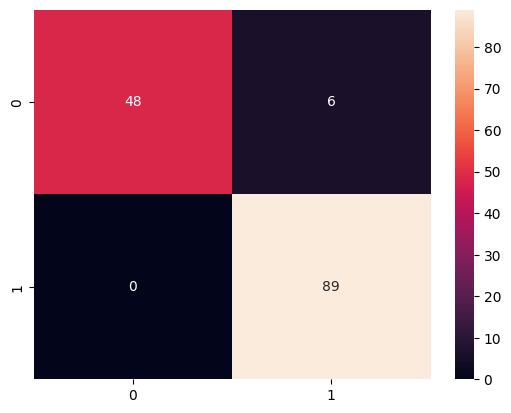

In [216]:
sns.heatmap(matriz,annot=True)